In [1]:
import pandas as pd
import numpy
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [42]:
train_df = pd.read_csv('train_data.csv')
train_df.drop(['game_mode'], axis=1)
train_df.head()
X= train_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)


In [43]:
X.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,45,80,88,8,98,45,80,88,8,98
1,56,1,23,47,97,56,1,23,47,97
2,68,63,16,48,21,68,63,16,48,21
3,74,105,71,16,73,74,105,71,16,73
4,94,85,83,86,128,94,85,83,86,128


In [44]:
X.shape[1]

10

In [45]:
y = train_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,1
2,1
3,1
4,0


In [46]:
y.describe()

,radiant_win
count,321618.000000
mean,0.647333
std,0.477801
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [8]:
X_train.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
10429,111,18,13,23,86,111,18,13,23,86
5772,76,22,104,1,111,76,22,104,1,111
33229,86,126,1,32,25,86,126,1,32,25
21637,8,21,99,74,91,8,21,99,74,91
5281,22,87,14,1,71,22,87,14,1,71


In [48]:
X_train.describe()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
count,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000,241213.000000
mean,58.163333,59.761074,51.394813,55.963410,57.402860,58.163333,59.761074,51.394813,55.963410,57.402860
std,38.019135,41.686649,37.758779,38.347059,37.928128,38.019135,41.686649,37.758779,38.347059,37.928128
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,20.000000,19.000000,25.000000,25.000000,21.000000,20.000000,19.000000,25.000000,25.000000
50%,59.000000,50.000000,42.000000,49.000000,51.000000,59.000000,50.000000,42.000000,49.000000,51.000000
75%,93.000000,100.000000,81.000000,88.000000,95.000000,93.000000,100.000000,81.000000,88.000000,95.000000
max,137.000000,137.000000,138.000000,138.000000,138.000000,137.000000,137.000000,138.000000,138.000000,138.000000


In [49]:
y_train.describe()

,radiant_win
count,241213.000000
mean,0.647793
std,0.477659
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
y_train.head()

,radiant_win
10429,1
5772,1
33229,1
21637,1
5281,1


### Model

In [50]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

Epoch 1/20
943/943 [==============================] - 11s 11ms/step - loss: 0.5504 - accuracy: 0.7268 - val_loss: 0.4289 - val_accuracy: 0.8077
Epoch 2/20
943/943 [==============================] - 9s 10ms/step - loss: 0.4562 - accuracy: 0.7939 - val_loss: 0.3149 - val_accuracy: 0.8676
Epoch 3/20
943/943 [==============================] - 10s 10ms/step - loss: 0.3917 - accuracy: 0.8313 - val_loss: 0.2639 - val_accuracy: 0.8928
Epoch 4/20
943/943 [==============================] - 9s 10ms/step - loss: 0.3671 - accuracy: 0.8461 - val_loss: 0.2424 - val_accuracy: 0.9050
Epoch 5/20
943/943 [==============================] - 10s 10ms/step - loss: 0.3559 - accuracy: 0.8524 - val_loss: 0.2404 - val_accuracy: 0.9134
Epoch 6/20
943/943 [==============================] - 10s 11ms/step - loss: 0.3473 - accuracy: 0.8566 - val_loss: 0.2217 - val_accuracy: 0.9454
Epoch 7/20
943/943 [==============================] - 11s 12ms/step - loss: 0.3387 - accuracy: 0.8616 - val_loss: 0.2227 - val_accuracy: 0

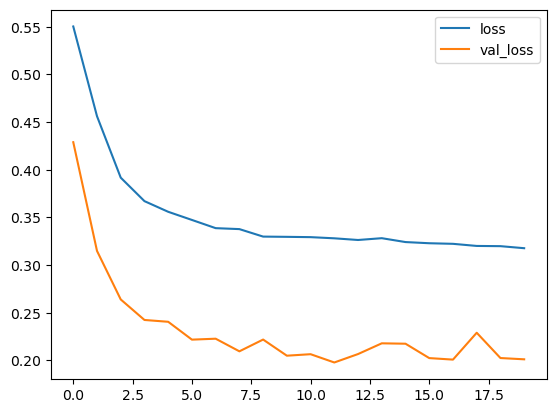

In [51]:
model.compile(
    #from_logits=False,
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
    verbose=1,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

### Test Data

In [39]:
test_df = pd.read_csv('train_data.csv')
test_df.drop(['game_mode'], axis=1)
test_df.head()
X_test= test_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)
y_test = test_df['radiant_win']

In [13]:
X_test.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,45,80,88,8,98,45,80,88,8,98
1,56,1,23,47,97,56,1,23,47,97
2,68,63,16,48,21,68,63,16,48,21
3,74,105,71,16,73,74,105,71,16,73
4,94,85,83,86,128,94,85,83,86,128


In [14]:
y = test_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,1
2,1
3,1
4,0


In [40]:
predicts = model.predict(X_test)

1116/1116 [==============================] - 3s 2ms/step


In [41]:
y_test_l = [int(b) for b in y_test]

results = []
for i in range(len(predicts)):
    if y_test_l[i] == round(predicts[i][0]):
        results.append(1)

print(len(results))
print(len(y_test))
print(predicts[0:500])


35328
35696
[[0.08459444]
 [0.9992999 ]
 [0.9827094 ]
 [0.7367209 ]
 [0.33302668]
 [0.98536694]
 [0.9944614 ]
 [0.11262515]
 [0.8531726 ]
 [0.4480259 ]
 [0.9842449 ]
 [0.9998777 ]
 [0.40760544]
 [0.19940664]
 [0.9819797 ]
 [0.84942585]
 [0.99938726]
 [0.9987613 ]
 [0.9751908 ]
 [0.9751006 ]
 [0.11869733]
 [0.99567384]
 [0.12820472]
 [0.7393686 ]
 [0.7668146 ]
 [0.13598812]
 [0.07098483]
 [0.93446124]
 [0.99628013]
 [0.9979328 ]
 [1.        ]
 [0.6448878 ]
 [0.9615098 ]
 [0.95428145]
 [0.46193406]
 [0.8685169 ]
 [0.9024986 ]
 [0.35545975]
 [1.        ]
 [0.4700746 ]
 [0.97530806]
 [0.9968965 ]
 [0.9864709 ]
 [0.99996436]
 [0.21184911]
 [0.8902232 ]
 [0.6619868 ]
 [0.9999969 ]
 [0.98220867]
 [1.        ]
 [0.99985266]
 [0.4048472 ]
 [0.99997365]
 [0.9988944 ]
 [0.84152997]
 [0.9999964 ]
 [0.10685553]
 [0.99999   ]
 [0.37093693]
 [0.23717459]
 [0.09683559]
 [0.4083008 ]
 [0.15665655]
 [1.        ]
 [0.9989519 ]
 [0.16520524]
 [0.94311786]
 [0.3816975 ]
 [0.11151785]
 [0.25667447]
 [0.9975